In [14]:
import statsmodels.api as sm
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import binom
import pylab
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import figure
import warnings
warnings.filterwarnings('ignore')
import scipy


# Student's t-test

- The t-test is any statistical hypothesis test in which the test statistic follows a Student's t-distribution under the null hypothesis.

- A t-test is the most commonly applied when the test statistic would follow a normal distribution if the value of a scaling term in the test statistic were known. When the scaling term is unknown and is replaced by an estimate based on the data, the test statistics (under certain conditions) follow a Student's t distribution. The t-test can be used, for example, to determine if the means of two sets of data are significantly different from each other.


- #### The most frequently used t-tests are one-sample and two-sample tests:

- A `one-sample` location test of whether the mean of a population has a value specified in a null hypothesis.
- A `two-sample` location test of the null hypothesis such that the means of `two populations` are equal.
- All such tests are usually called Student's t-tests, though strictly speaking that name should only be used if the variances of the two populations are also assumed to be equal; the form of the test used when this assumption is dropped is sometimes called Welch's t-test. 
- These tests are often referred to as unpaired or independent samples t-tests, as they are typically applied when the statistical units underlying the two samples being compared are non-overlapping.



- one sample t-test : 
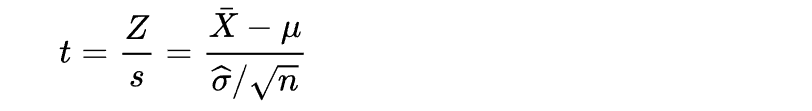
- where X is the sample mean from a sample X1, X2, …, Xn, of size n, s is the standard error of the mean, sigma is the estimate of the standard deviation of the population, and μ is the population mean.



### Independent (unpaired) samples : 

- The independent samples t-test is used when two separate sets of independent and identically distributed samples are obtained, and one variable from each of the two populations is compared.
- For example, suppose we are evaluating the effect of a medical treatment, and we enroll 100 subjects into our study, then randomly assign 50 subjects to the treatment group and 50 subjects to the control group. 
- In this case, we have two independent samples and would use the unpaired form of the t-test.

### Paired Samples : dependent Samples t-tests : 

- Paired samples t-tests typically consist of a sample of matched pairs of similar units, or one group of units that has been tested twice (a "repeated measures" t-test).

- A typical example of the repeated measures t-test would be where subjects are tested prior to a treatment, say for high blood pressure, and the same subjects are tested again after treatment with a blood-pressure-lowering medication.
- By comparing the same patient's numbers before and after treatment, we are effectively using each patient as their own control.
- That way the correct rejection of the null hypothesis (here: of no difference made by the treatment) can become much more likely, with statistical power increasing simply because the random interpatient variation has now been eliminated. 
- However, an increase of statistical power comes at a price: more tests are required, each subject having to be tested twice. Because half of the sample now depends on the other half, the paired version of Student's t-test has only n/2 − 1 degrees of freedom (with n being the total number of observations). 
- Pairs become individual test units, and the sample has to be doubled to achieve the same number of degrees of freedom. 
- Normally, there are n − 1 degrees of freedom (with n being the total number of observations).

- A paired samples t-test based on a "matched-pairs sample" results from an unpaired sample that is subsequently used to form a paired sample, by using additional variables that were measured along with the variable of interest.
- The matching is carried out by identifying pairs of values consisting of one observation from each of the two samples, where the pair is similar in terms of other measured variables.
- This approach is sometimes used in observational studies to reduce or eliminate the effects of confounding factors.

- Paired samples t-tests are often referred to as "dependent samples t-tests".

## One-sample t-test : 
 
- In testing the null hypothesis that the sample mean is equal to a specified value μ0, one uses the statistic

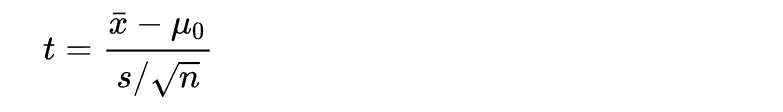

    - where bar {x} is the sample mean, s is the sample standard deviation and n is the sample size. 
    The degrees of freedom used in this test are n − 1. 
- Although the parent population does not need to be normally distributed, the distribution of the population of sample means bar {x} is assumed to be normal.

- `By the central limit theorem, if the observations are independent and the second moment exists`, `then t will be approximately normal N(0;1).`

suppose we are given 1000 baby's weight from india : 

task is : the mean weight of baby is  μ0 = 2.8kgs. (whole world's baby's weight's mean)

In [2]:
# samplebabyweight_from_india

X = np.random.normal(2.8,1,1000)  # sample's of Indian baby weight


In [3]:
X= X[X>1]

In [4]:
Tobs = ((np.mean(X) - 2.8))/(np.std(X)/np.sqrt(len(X)))


In [5]:
Tobs

3.366388208689523

In [6]:
Tcritical = stats.t.cdf

<IPython.core.display.Javascript object>

In [7]:
Tcritical_right = stats.t.ppf(0.975,len(X)-1)
Tcritical_left = stats.t.ppf(0.025,len(X)-1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
significance_level = 0.5

In [9]:
p_value = 2* stats.t.cdf(-2.025,len(X)-1)
p_value

<IPython.core.display.Javascript object>

0.043145161925194464

In [10]:
stats.ttest_1samp(X,2.8)

<IPython.core.display.Javascript object>

Ttest_1sampResult(statistic=3.364627084734994, pvalue=0.0007969780441600446)

## Independent two-sample t-test : 


Given two groups (1, 2), this test is only applicable when:


 - This test, also known as Welch's t-test, is used only when the two population variances are not assumed to be equal (the two sample sizes may or may not be equal) and hence must be estimated separately. 
 - The t statistic to test whether the population means are different is calculated as:

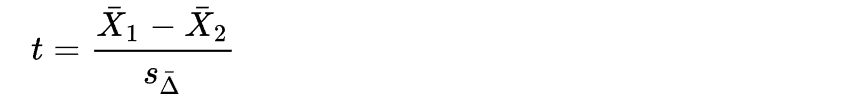
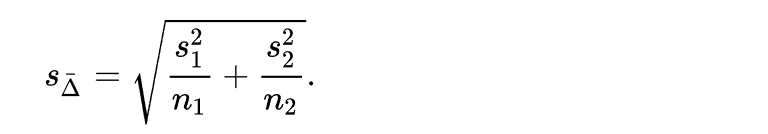
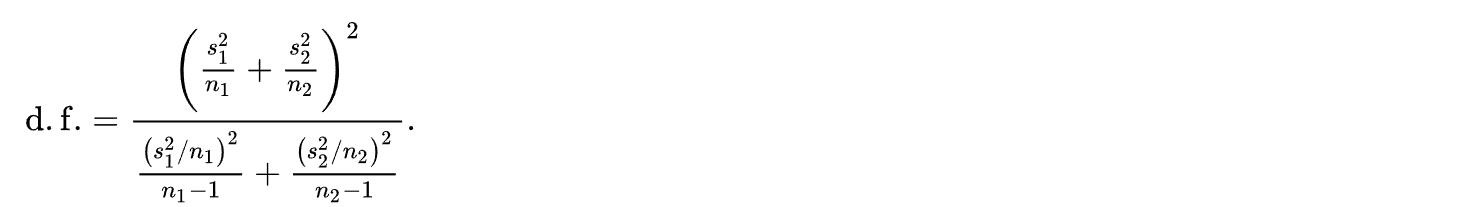

In [ ]:
`

## Dependent t-test for paired samples : 

- This test is used when the samples are dependent; that is, when there is only one sample that has been tested twice (repeated measures) or when there are two samples that have been matched or "paired". 
- This is an example of a paired difference test. The t statistic is calculated as

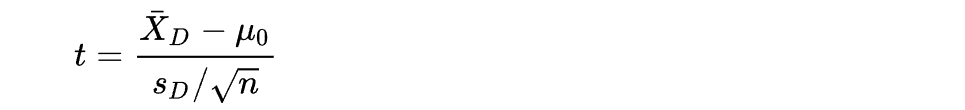

    - where Xbar-D and sd are the average and standard deviation of the differences between all pairs. 
- The pairs are e.g. either one person's pre-test and post-test scores or between-pairs of persons matched into meaningful groups (for instance drawn from the same family or age group: see table). 
- The constant μ0 is zero if we want to test whether the average of the difference is significantly different. 
- The degree of freedom used is n − 1, where n represents the number of pairs.

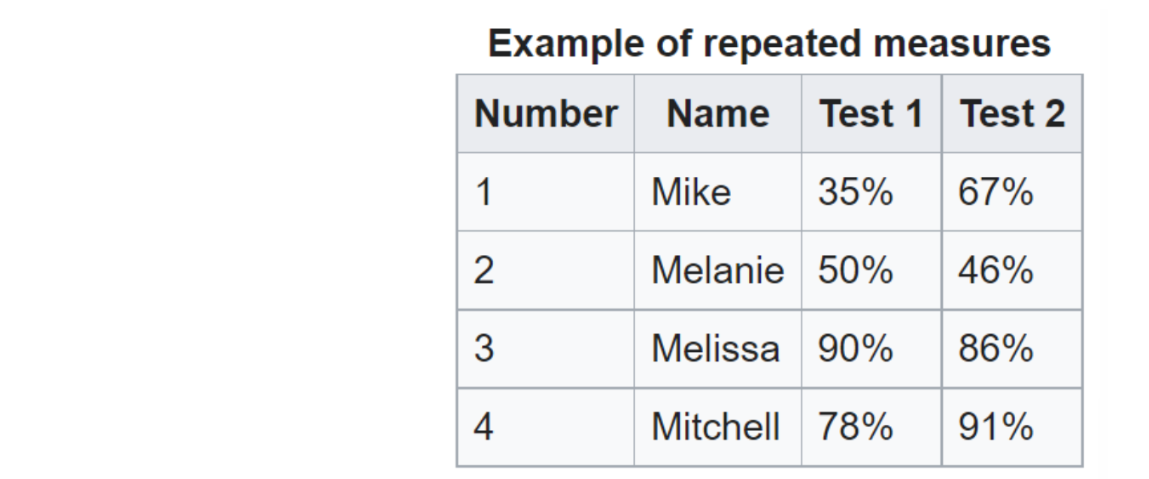

### fundamental requirements for applying t-test : 
    
    CLT , population mean and standard deviation are finite. 
    

### Degrees of freedom 
- (often abbreviated df or DOF) refers to the number of independent variables or parameters of a system.

- Degrees of freedom (statistics) refers to the number of variables in a statistic calculation that can vary.
- It can be calculated by subtracting the number of estimated parameters from the total number of values in the sample.
- For example, a sample variance calculation based on n samples will have n-1 degrees of freedom, because sample variance is calculated using the sample mean as an estimate of the actual mean.

In [11]:
# test scores before and after the remedial course : 

In [12]:
test1 = np.random.randint(50,80,100)
test2 = np.random.randint(55,80,100)

In [13]:
test1

array([72, 67, 60, 73, 73, 60, 64, 77, 53, 71, 60, 76, 57, 78, 77, 73, 69,
       55, 78, 69, 65, 75, 51, 60, 60, 58, 61, 67, 57, 69, 70, 50, 54, 67,
       53, 51, 52, 51, 58, 72, 63, 75, 70, 51, 73, 60, 71, 61, 52, 54, 54,
       50, 79, 78, 71, 76, 54, 65, 70, 61, 78, 54, 51, 57, 50, 69, 74, 62,
       79, 56, 72, 56, 78, 51, 60, 70, 59, 60, 73, 60, 65, 65, 67, 69, 50,
       71, 57, 68, 55, 56, 71, 74, 74, 61, 70, 52, 52, 69, 53, 52])

In [14]:
test1, test2 = pd.Series(test1),pd.Series(test2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
df = pd.DataFrame([test1,test2],index=["Test1","Test2"]).T
df

<IPython.core.display.Javascript object>

,Test1,Test2
0,72,71
1,67,62
2,60,70
3,73,66
4,73,64
...,...,...
95,52,71
96,52,76
97,69,72
98,53,79


In [16]:
df.index = df.index+1

In [17]:
df["difference"]= df["Test2"]-df["Test1"]

In [18]:
df.head(5)

,Test1,Test2,difference
1,72,71,-1
2,67,62,-5
3,60,70,10
4,73,66,-7
5,73,64,-9


In [19]:
# task is to identify if the remedial session actually 
# helped students get better at exams.


In [20]:
sample_mean_difference = np.mean(df["difference"])
sample_mean_difference # (xbar-D)


3.33

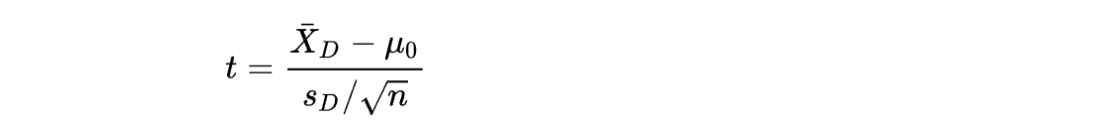

In [21]:
t_observed = (np.mean(df["difference"])- (5))/(np.std(df["difference"],ddof=1)/np.sqrt(len(df)))

In [22]:
t_observed

-1.3814277233223409

In [23]:
t_critical = stats.t.ppf(0.95,len(df)-1)

<IPython.core.display.Javascript object>

In [24]:
t_critical

1.6603911559963895

In [25]:
p_value = 1-stats.t.cdf(t_observed,len(df)-1)
p_value

<IPython.core.display.Javascript object>

0.9148713210320081

In [26]:
stats.ttest_1samp(df["difference"],5,alternative="greater")

<IPython.core.display.Javascript object>

Ttest_1sampResult(statistic=-1.3814277233223407, pvalue=0.914871321032008)

In [27]:
p_value < 0.05

False

In [28]:
t_observed > t_critical

False

In [29]:
if p_value > 0.05:
    
    print("failed to reject null , so no improvement of 5 marks atleast")
else:
    print("reject null, so improvement")
if t_observed > t_critical:
    print("reject null,  so improvement")
else:
    print("failed to reject null ,  so no improvement of 5 marks atleast")

failed to reject null , so no improvement of 5 marks atleast
failed to reject null ,  so no improvement of 5 marks atleast


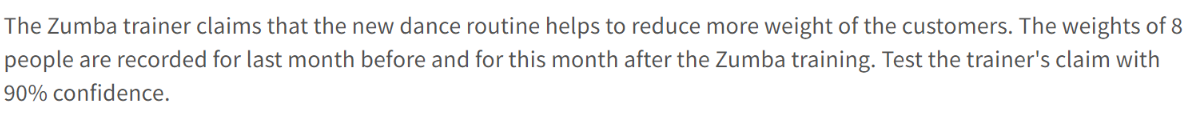

In [262]:

wt_before=pd.Series([85, 74, 63.5, 69.4, 71.6, 65,   90,  78])
wt_after=pd.Series([ 82,  71, 64,   65.2, 67.8, 64.7, 95,  77])


In [263]:
df = pd.DataFrame([wt_after,wt_before]).T
df["D"] = df[1]-df[0]
data = df["D"]

In [264]:
data.mean()

1.2249999999999996

In [265]:
t_obs = (np.mean(data)-0)/  ( np.std(data,ddof=1) / np.sqrt(len(data)) )  # t_obs

In [266]:
t_obs

1.1421853793555032

In [267]:
t_critical = stats.t.ppf(0.90,7) # critical T

In [268]:
stats.ttest_rel(df[0],df[1])

Ttest_relResult(statistic=-1.142185379355503, pvalue=0.29093617002652783)

In [269]:
stats.ttest_rel(df[1],df[0])

Ttest_relResult(statistic=1.142185379355503, pvalue=0.29093617002652783)

In [270]:
p_val = 2*(1-stats.t.cdf(t_obs,len(df)-1))

In [271]:
p_val

0.29093617002652783

In [272]:
t_obs,t_critical

(1.1421853793555032, 1.4149239276488585)

In [273]:
if p_val > 0.10:
    print("failed to reject null")
else:
    print("rject H0")

failed to reject null


In [274]:
if t_obs < t_critical:
    print("failed to reject ")
else:
    print("reject")

failed to reject 


# Kolmogorov - Smirnov Test : 

- In statistics, the Kolmogorov–Smirnov test (K-S test or KS test) is a nonparametric test of the equality of continuous (or discontinuous), one-dimensional probability distributions that can be used to compare a sample with a reference probability distribution (one-sample K–S test), or to compare two samples (two-sample K–S test).

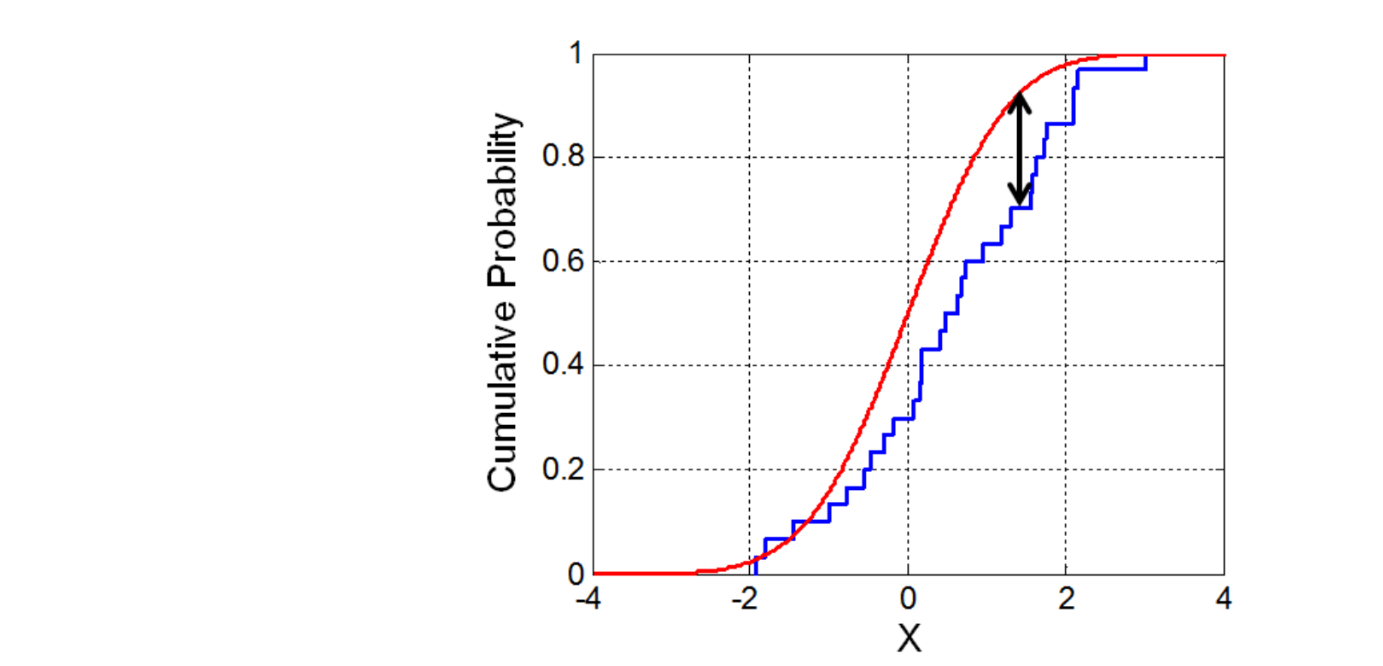

- The Kolmogorov–Smirnov statistic quantifies a distance between the empirical distribution function of the sample and the cumulative distribution function of the reference distribution, or between the empirical distribution functions of two samples.
- The null distribution of this statistic is calculated under the null hypothesis that the sample is drawn from the reference distribution (in the one-sample case) or that the samples are drawn from the same distribution (in the two-sample case). 
- In the one-sample case, the distribution considered under the null hypothesis may be continuous , purely discrete or mixed .
- In the two-sample case , the distribution considered under the null hypothesis is a continuous distribution but is otherwise unrestricted.
- However, the two sample test can also be performed under more general conditions that allow for discontinuity, heterogeneity and dependence across samples.

- The two-sample K–S test is one of the most useful and general non-parametric methods for comparing two samples, as it is sensitive to differences in both location and shape of the empirical cumulative distribution functions of the two samples.

## Kolmogorov–Smirnov statistic

The empirical distribution function Fn for n independent and identically distributed (i.i.d.) ordered observations Xi is defined as
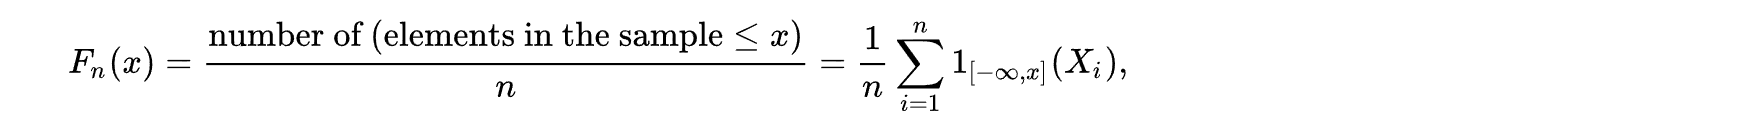
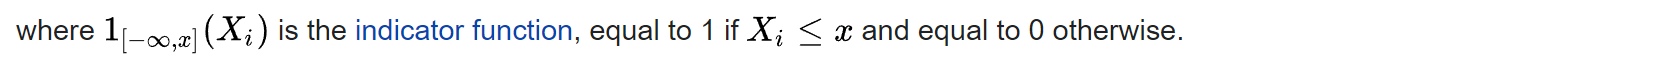
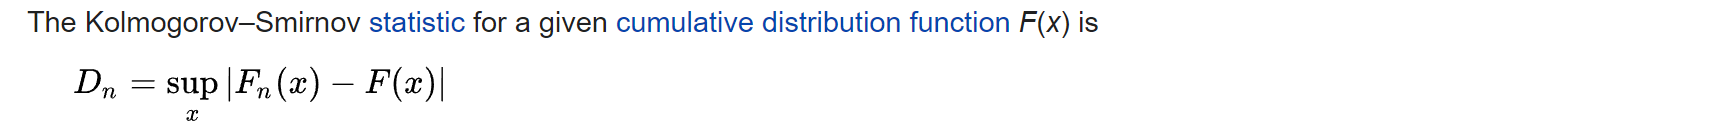
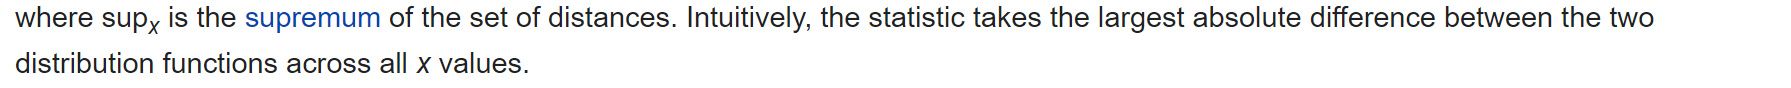

> supx is the supremum of the set of distances. Intuitively, the statistic takes the largest absolute difference between the two distribution functions across all x values.

>
    under null hypothese : H0 : Dn will be close to 0
    under alternative :    Ha : Dn wil be >0

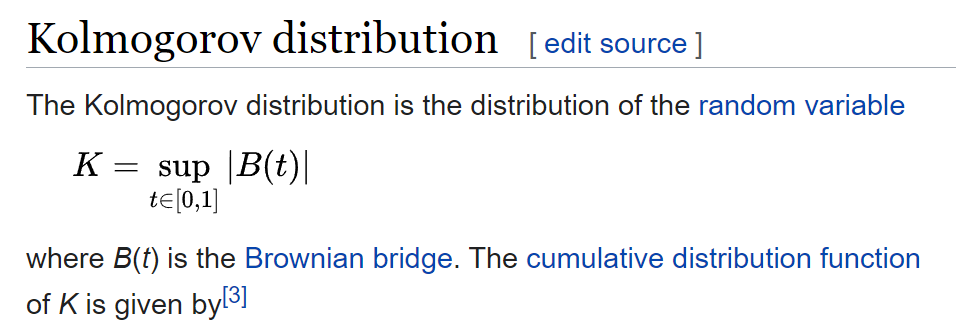

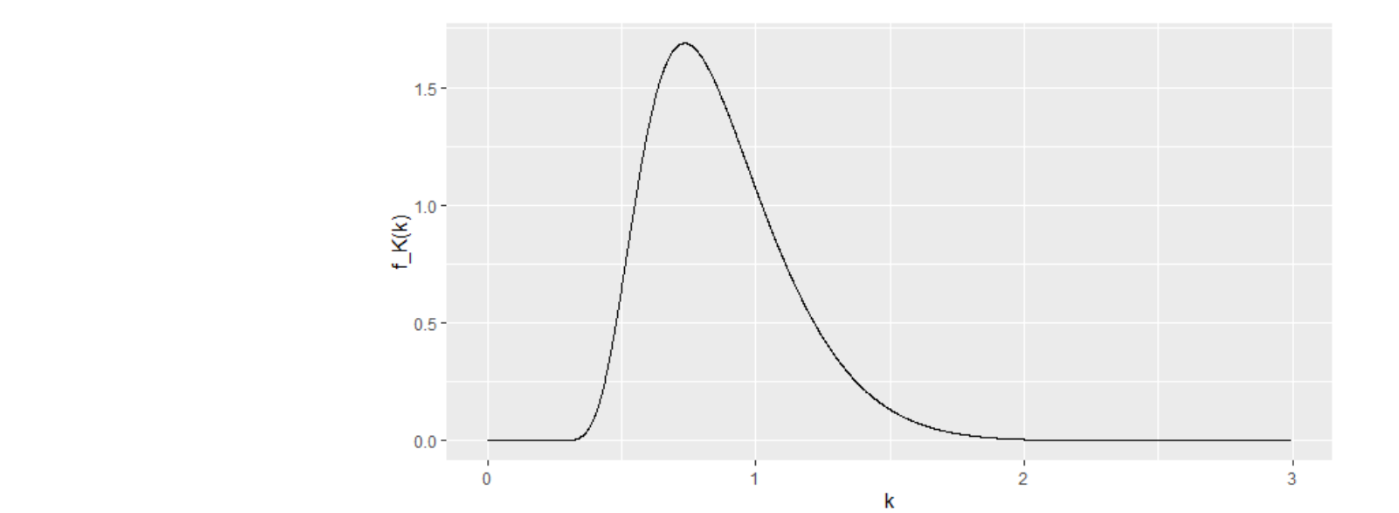

Kolmogorov smirnov - test statistic   - 
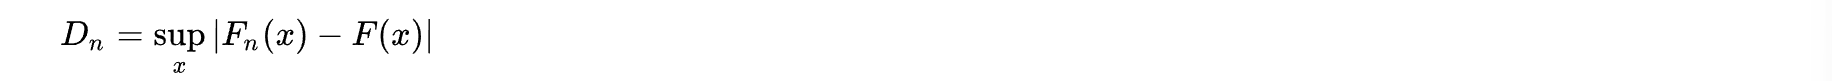
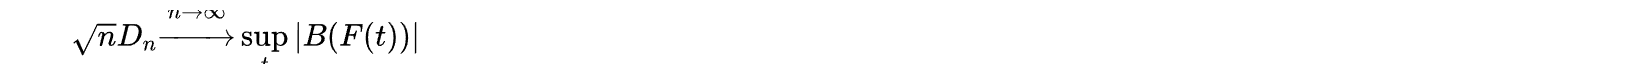

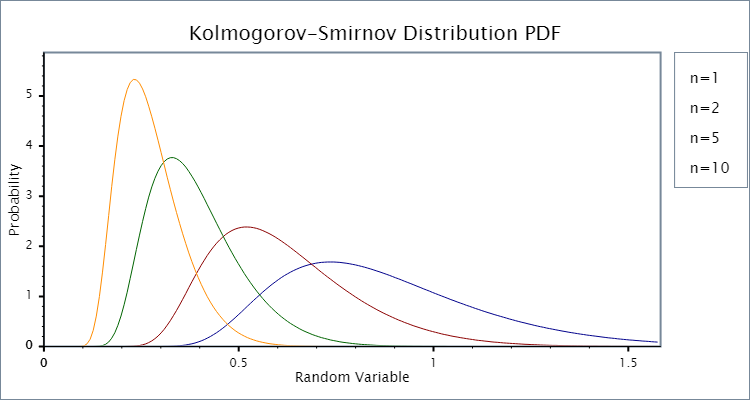

In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt


# recovery·times·of·patients·who·took·medicine-1

r1 = [8.82420842, 7.47774471, 7.55712098, 7.98131439, 6.82771606,
       7.48566433, 9.15385732, 5.84040502, 8.26124313, 8.4728876 ,
       6.82582186, 7.00490974, 8.43423058, 6.72099932, 6.97495982,
       5.93748053, 5.40707847, 6.16385557, 6.71421056, 4.42396183,
       6.87285228, 8.00313581, 6.69035041, 7.83622942, 8.70984957,
       5.56284584, 9.08093437, 4.98165193, 7.67769408, 6.04738478,
       7.64921582, 7.31051639, 6.74463303, 7.27356973, 8.16787232,
       6.90990965, 7.06439167, 6.62921957, 6.08283539, 6.2458137 ,
       8.65173634, 5.76080646, 6.20573219, 8.91561004, 6.22560201,
       5.67542104, 6.97412435, 8.31354697, 8.14172701, 8.26099345,
       7.87612791, 6.24835109, 9.95324783, 6.59504627, 6.17365145,
       6.05676895, 7.23030223, 7.71311809, 7.37163804, 5.69798738,
       5.71056902, 7.94556876, 7.47234105, 6.85346234, 4.77892053,
       6.92631063, 6.10681151, 7.06277198, 7.18023164, 7.78285327,
       7.85500885, 6.54349161, 8.25949958, 6.44289198, 7.16705977,
       6.03517015, 7.61274786, 7.032845  , 6.78161745, 7.07917968,
       6.21549342, 5.34267439, 6.73039933, 7.70562561, 8.15117049,
       6.72564324, 6.68220904, 8.50359274, 7.52912703, 7.34572493,
       5.95734283, 6.58259396, 6.49394335, 8.68069592, 8.60547125,
       6.8905056 , 7.72575925, 6.84801609, 7.96999724, 7.10420915]

# recovery times of patietnts who took medicine-2

r2 = [ 9.56597358,  7.49291458,  8.73841824,  7.63523452,  4.12559277,
        7.3679259 ,  9.87873565,  6.14516559,  8.19923821,  7.30169992,
       10.24606417,  6.83814477,  7.01611267,  6.15716049,  8.29590714,
       12.3333305 ,  8.22144016,  6.06830071,  3.75820649,  6.69220157,
       10.08721618,  9.70580422,  7.31050006, 11.40145721,  5.64818498,
        7.38914449,  8.43740074,  6.3451435 ,  7.05694361,  8.1997151 ,
        9.03059061,  7.76904679,  6.92375578,  5.78318543,  8.99027781,
        7.56186529,  5.27095372,  8.32896688, 11.52935757,  7.08119961,
        9.48825066,  9.14072759,  7.30357663,  8.62183754, 10.40999814,
        8.70096763,  7.04645384,  6.378799  , 10.5098363 ,  7.36078888,
        7.33403615,  8.07396248,  6.18309499,  7.24668404,  9.03430611,
        8.99016584,  6.78606416,  8.436418  ,  6.85877947, 10.10405772,
        6.74943076,  7.57812376,  7.12920671,  9.38065269,  9.57139966,
        6.4484012 ,  6.93877043,  9.22141667,  8.34815638,  7.73980671,
        7.17840767,  9.27913457,  6.49963224,  9.92287292,  7.63978639,
        9.53931977,  9.02602273,  6.79374185,  8.59715131,  8.37747338,
        8.78161815,  6.78716383,  8.28473394,  8.20283798, 12.50518811,
       10.19772574,  8.93758457,  8.9540311 ,  8.28927558,  6.28935098,
        7.69447559,  9.66777701, 10.33898342,  8.71199578,  5.12781581,
        9.70954569,  9.13685031,  7.28989718,  8.0868909 ,  7.42937556,
        7.31356749,  9.92345816,  8.60211814,  9.33228465,  8.14132658,
        6.17871495, 10.28358242,  7.31898597,  7.95085527,  6.20331719,
        9.19119762,  6.98600628,  7.05314883, 10.57921482,  6.83637574,
        7.86199283,  8.23350975,  5.87625665,  7.78945364,  8.83612492]

    H0 : distribution of r1  =  distribution of r2
    Ha : distribution of r1 !=  distribution of r2
    
    

In [2]:
distribution_r1 = np.array(r1)
distribution_r2 = np.array(r2)

In [3]:
n1,n2 = len(distribution_r1),len(distribution_r2)

In [4]:
n1,n2

(100, 120)

In [5]:
# 2 sample ks test : 
stats.ks_2samp(distribution_r1,distribution_r2)

KstestResult(statistic=0.3233333333333333, pvalue=1.5163387982131127e-05)

In [6]:
maxgap = stats.ks_2samp(distribution_r1,distribution_r2)[0]

In [7]:
maxgap

0.3233333333333333

In [8]:
p_value = stats.ks_2samp(distribution_r1,distribution_r2)[-1]

In [10]:
p_value

1.5163387982131127e-05

In [13]:
p_value < 0.01

True

    reject null hypothesis

    distributions of r1 and r2 are not same

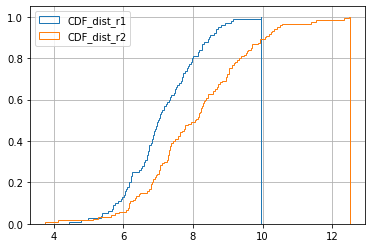

In [54]:
plt.grid()
plt.hist(distribution_r1,cumulative=True,label = "CDF_dist_r1",density=True,histtype="step",bins = 500)
plt.hist(distribution_r2,cumulative=True,label = "CDF_dist_r2",density=True,histtype="step",bins = 500)
plt.legend(loc="upper left")
plt.show()

In [ ]:
# lets say two coins tossed 100 times : 
# check if both coins binomial distributions are same  

In [120]:
A = pd.Series(stats.binom.rvs(100,0.6,size=5000))
B = pd.Series(stats.binom.rvs(100,0.6,size=5000))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:ylabel='Density'>

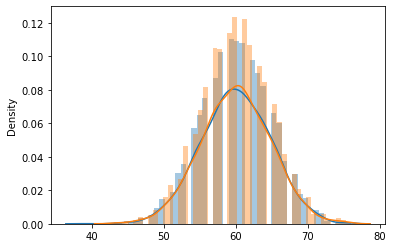

In [121]:
sns.distplot(A)
sns.distplot(B)

In [122]:
stats.ks_2samp(A,B)

KstestResult(statistic=0.0062, pvalue=0.999978619378823)

In [123]:
0.99>0.05

True

# Anderson–Darling test :

- The Anderson–Darling test is a statistical test of whether a given sample of data is drawn from a given probability distribution.

- In its basic form, the test assumes that there are no parameters to be estimated in the distribution being tested, in which case the test and its set of critical values is distribution-free. 
- However, the test is most often used in contexts where a family of distributions is being tested, in which case the parameters of that family need to be estimated and account must be taken of this in adjusting either the test-statistic or its critical values.
- When applied to testing whether a normal distribution adequately describes a set of data, it is one of the most powerful statistical tools for detecting most departures from normality.
-  K-sample Anderson–Darling tests are available for testing whether several collections of observations can be modelled as coming from a single population, where the distribution function does not have to be specified.


In [56]:
stats.anderson(distribution_r1)

AndersonResult(statistic=0.18595480932506803, critical_values=array([0.555, 0.632, 0.759, 0.885, 1.053]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

<AxesSubplot:ylabel='Density'>

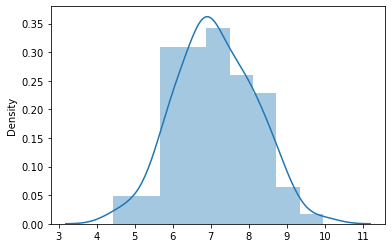

In [93]:
sns.distplot(distribution_r1)

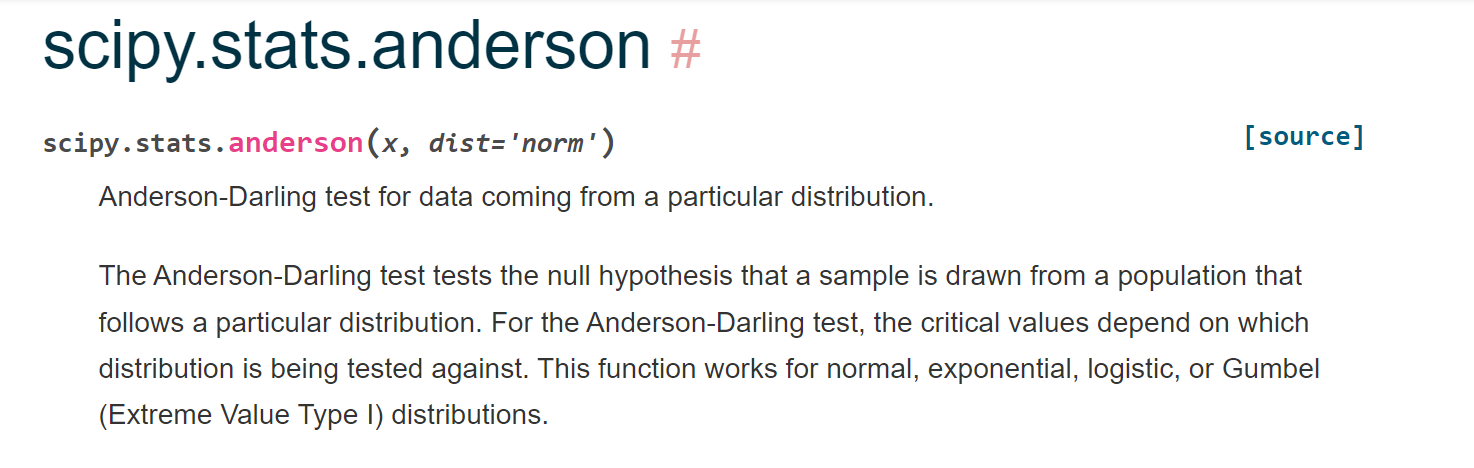
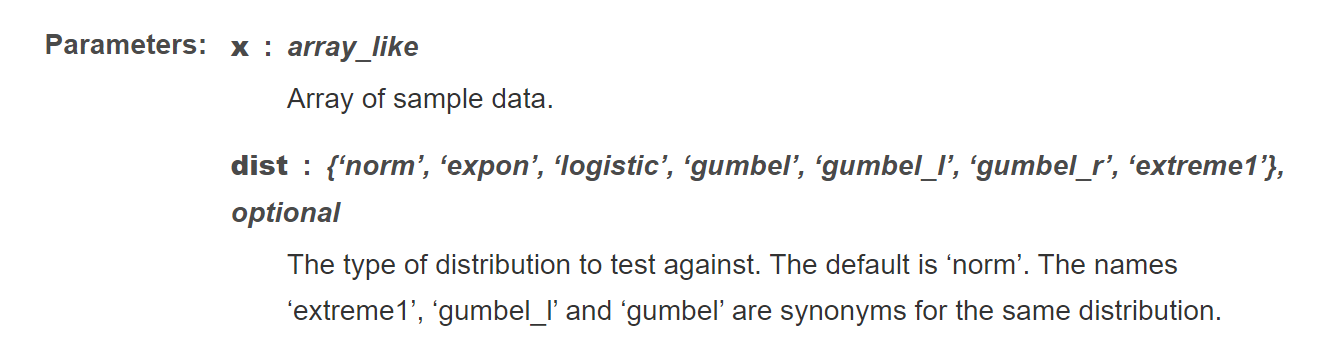
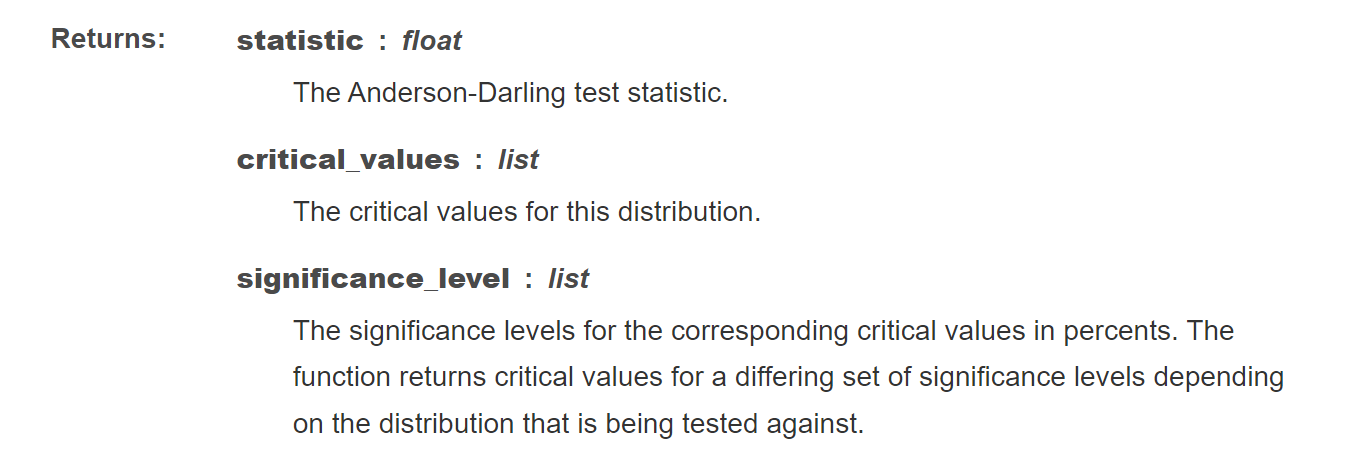

# z-Proportion Test : 

lets say 

A retail websites  : 
    
    
    A . old webstie
        
        p1-hat = convertion1/visit1 
        
    B . new website
        
        p2-hat = convertion2/visit2
        
    - p1-hat and p2-hat are observed proportions 

    task is to compare the population proportion (p1 and p2).
    
    
- H0 : p1 = p2
- Ha : p1 != p2

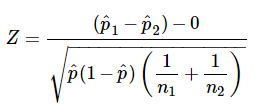

    p1-hat = convertion1/visit1 
    p2-hat = convertion2/visit2

    p-hat = (convertion1 + convertion 2)  /  (visit1 + vist2)

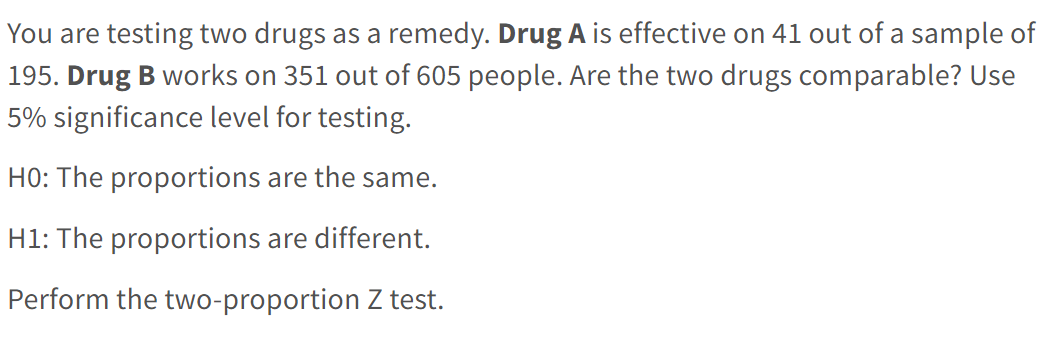

## Example question:

- let’s say you’re testing two flu drugs A and B. Drug A works on 41 people out of a sample of 195. Drug B works on 351 people in a sample of 605. Are the two drugs comparable? Use a 5% alpha level.

        H0 : p1 = p2 
        Ha: p1 != p2
        

        Find the two proportions:

        P1 = 41/195 
           = 0.21 (that’s 21%)
        P2 = 351/605 
           = 0.58 (that’s 58%).
        
        
        
        Find the overall sample proportion. 
        The numerator will be the total number of “positive” results for the two samples
        and the denominator is the total number of people in the two samples.

        p = (41+351)/(195+605)
          = 0.49
          
        T = (0.58-0.21)
            /(0.49(1-0.49))*(1/195+1/605)

In [97]:
(0.58-0.21)/(np.sqrt((0.49*(1-0.49))*(1/195+1/605)))

8.988114484183672

     The z-score associated with a 5% alpha level / 2 is 1.96.
     



In [98]:
stats.norm.ppf(0.975)

1.959963984540054

        8.99 > 1.95

        so we reject null Hypothesis. 

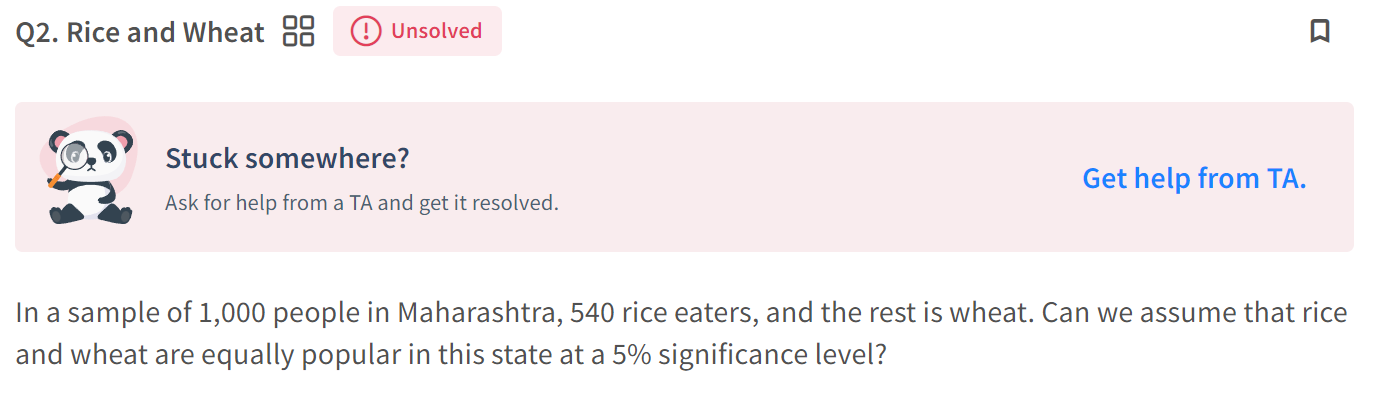

    H0: Both rice and wheat are equally popular in the State (P = 0.5)
    Ha: Both rice and wheat are not equally popular in the State( P <> 0.5)(two-tailed test).
    
    n = 1000  
    x = no of ricec eaters = 540 

    p_hat =  540/1000 # sample proportion of rice eaters 

    p = population proportion of rice eaters = 1/2 = 0.5


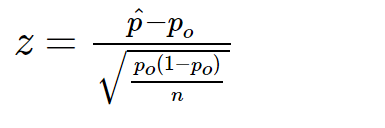

     test_statistic = ( 0.54 - 0.5 )
                      / (np.sqrt((0.5*(1-0.5))/1000))

In [275]:
(0.54-0.5)/(np.sqrt((0.5*(1-0.5))/1000))

2.5298221281347057

In [278]:
norm.ppf(0.975)

1.959963984540054

    The significant or critical value of Z at a 5 % level of significance for the two-tailed test is 1.96.
    Since Zstat > Zcritical. Hence reject the null hypothesis and it is concluded that rice and wheat are not equally popular in Maharashtra State.

# Chi-Square Test : (test of independence)

- A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test and variants thereof. 

- Pearson's chi-squared test is used to determine whether there is a statistically significant difference between the expected frequencies and the observed frequencies in one or more categories of a contingency table.

- In the standard applications of this test, the observations are classified into mutually exclusive classes.
- If the null hypothesis that there are no differences between the classes in the population is true, the test statistic computed from the observations follows a χ2 frequency distribution.
- The purpose of the test is to evaluate how likely the observed frequencies would be assuming the null hypothesis is true.

- Test statistics that follow a χ2 distribution occur when the observations are independent.
- There are also χ2 tests for testing the null hypothesis of independence of a pair of random variables based on observations of the pairs.

- Chi-squared tests often refers to tests for which the distribution of the test statistic approaches the χ2 distribution asymptotically, meaning that the sampling distribution (if the null hypothesis is true) of the test statistic approximates a chi-squared distribution more and more closely as sample sizes increase.

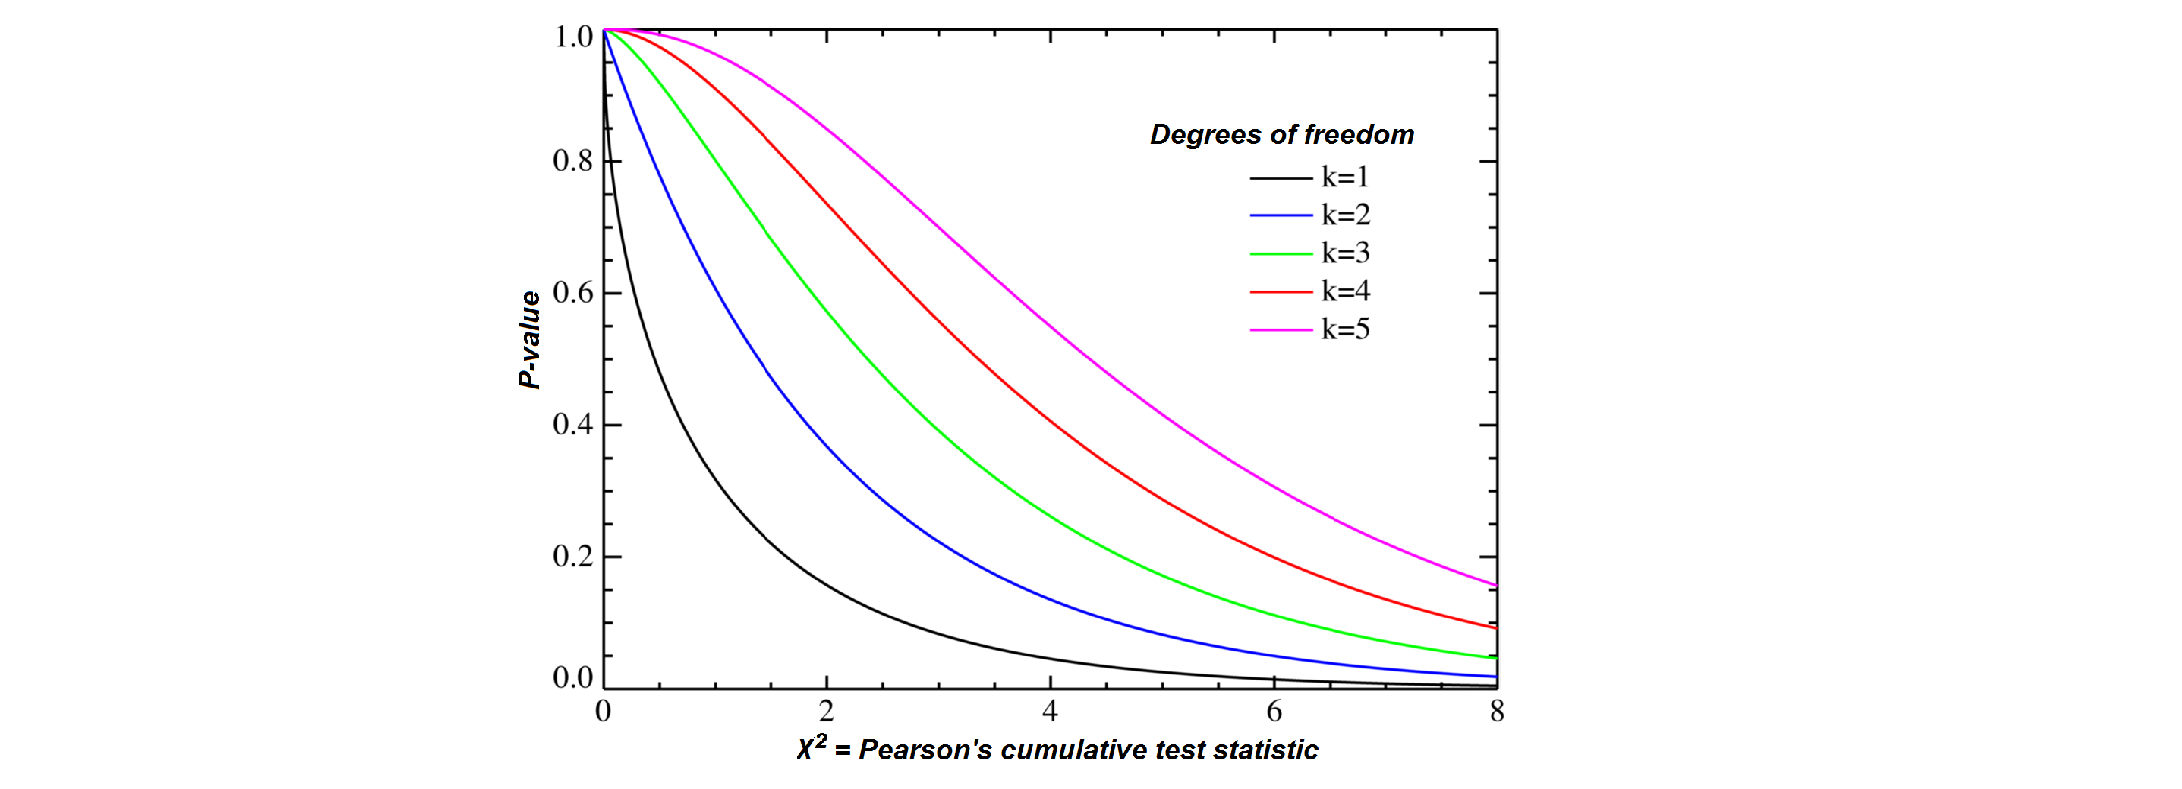

#### Example chi-squared test for categorical data

    Suppose there is a city of 1,000,000 residents with four neighborhoods: A, B, C, and D. A random sample of 650 residents of the city is taken and their occupation is recorded as "white collar", "blue collar", or "no collar". The null hypothesis is that each person's neighborhood of residence is independent of the person's occupational classification. The data are tabulated as:

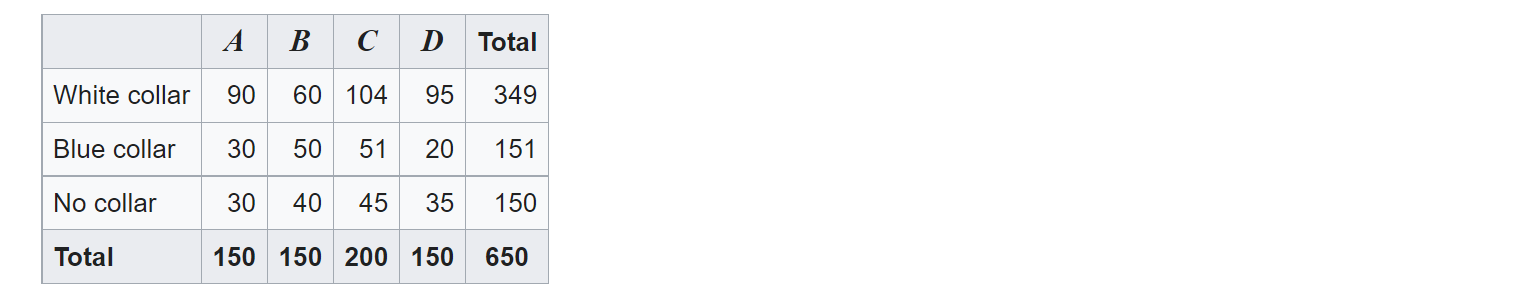


- Let us take the sample living in neighborhood A, 150, to estimate what proportion of the whole 1,000,000 live in neighborhood A. Similarly we take 349/650 to estimate what proportion of the 1,000,000 are white-collar workers. By the assumption of independence under the hypothesis we should "expect" the number of white-collar workers in neighborhood A to be

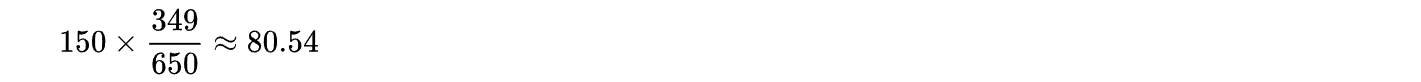

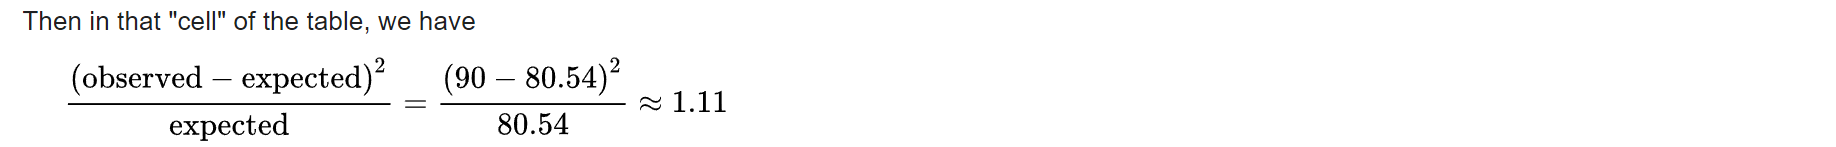

- The sum of these quantities over all of the cells is the test statistic; in this case, approx 24.6.
- Under the null hypothesis, this sum has approximately a chi-squared distribution whose number of degrees of freedom is
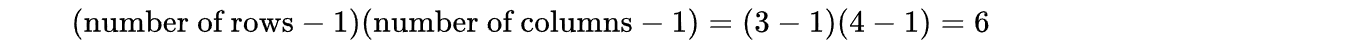

If the test statistic is improbably large according to that chi-squared distribution, then one rejects the null hypothesis of independence.


- A related issue is a `test of homogeneity`.

- Suppose that instead of giving every resident of each of the four neighborhoods an equal chance of inclusion in the sample, we decide in advance how many residents of each neighborhood to include.
- Then each resident has the same chance of being chosen as do all residents of the same neighborhood, but residents of different neighborhoods would have different probabilities of being chosen if the four sample sizes are not proportional to the populations of the four neighborhoods. In such a case, we would be testing "homogeneity" rather than "independence".
- The question is whether the proportions of blue-collar, white-collar, and no-collar workers in the four neighborhoods are the same. However, the test is done in the same way.

In [249]:
# <!-- 	A	B	C	D	Total -->
White_collar= [90,	60	,104,	95	]
Blue_collar	= [30	,50,	51	,20	]
No_collar	= [30,	40	,45	,35	]


In [250]:
observed = pd.DataFrame((pd.Series(White_collar),
            pd.Series(Blue_collar),
            pd.Series(No_collar)),index=["Whilte Collar","Blue Collar","No Collar"])


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [251]:
observed.columns = ["A","B","C","D"]

In [252]:
observed

,A,B,C,D
Whilte Collar,90,60,104,95
Blue Collar,30,50,51,20
No Collar,30,40,45,35


In [253]:
# observed.loc["total"] = observed.sum(axis=0)
# observed["total"] = observed.sum(axis = 1)

In [254]:
row_sum = np.array(np.sum(observed,axis = 1))
col_sum = np.array(np.sum(observed,axis = 0))
total_sum = np.sum(np.sum(observed,axis = 0))

In [255]:
expected = []
for i in row_sum:
    expected.append((i*col_sum)/total_sum)
expected

[array([ 80.53846154,  80.53846154, 107.38461538,  80.53846154]),
 array([34.84615385, 34.84615385, 46.46153846, 34.84615385]),
 array([34.61538462, 34.61538462, 46.15384615, 34.61538462])]

In [256]:
expected = pd.DataFrame(expected,columns=observed.columns)

<IPython.core.display.Javascript object>

In [258]:
expected.index = observed.index
expected

,A,B,C,D
Whilte Collar,80.538462,80.538462,107.384615,80.538462
Blue Collar,34.846154,34.846154,46.461538,34.846154
No Collar,34.615385,34.615385,46.153846,34.615385


In [259]:
o_e_2_by_e = ((observed-expected)**2)/expected

In [262]:
np.sum(np.sum(o_e_2_by_e))   # test statistic

24.571202858582602

In [272]:
stats.chi2.ppf(0.95,df=6)  # chi-sq critical value

12.591587243743977

In [271]:
1-stats.chi2.cdf(24.57,6)       # p_value

0.0004100522327264988

In [ ]:
# from library 

In [198]:
stats.chi2_contingency(observed)

(24.5712028585826,
 0.0004098425861096696,
 6,
 array([[ 80.53846154,  80.53846154, 107.38461538,  80.53846154],
        [ 34.84615385,  34.84615385,  46.46153846,  34.84615385],
        [ 34.61538462,  34.61538462,  46.15384615,  34.61538462]]))

In [172]:
stats.chi2_contingency(observed)

(24.5712028585826,
 0.0004098425861096696,
 6,
 array([[ 80.53846154,  80.53846154, 107.38461538,  80.53846154],
        [ 34.84615385,  34.84615385,  46.46153846,  34.84615385],
        [ 34.61538462,  34.61538462,  46.15384615,  34.61538462]]))

In [173]:
stats.chi2_contingency(observed)[-1]

array([[ 80.53846154,  80.53846154, 107.38461538,  80.53846154],
       [ 34.84615385,  34.84615385,  46.46153846,  34.84615385],
       [ 34.61538462,  34.61538462,  46.15384615,  34.61538462]])

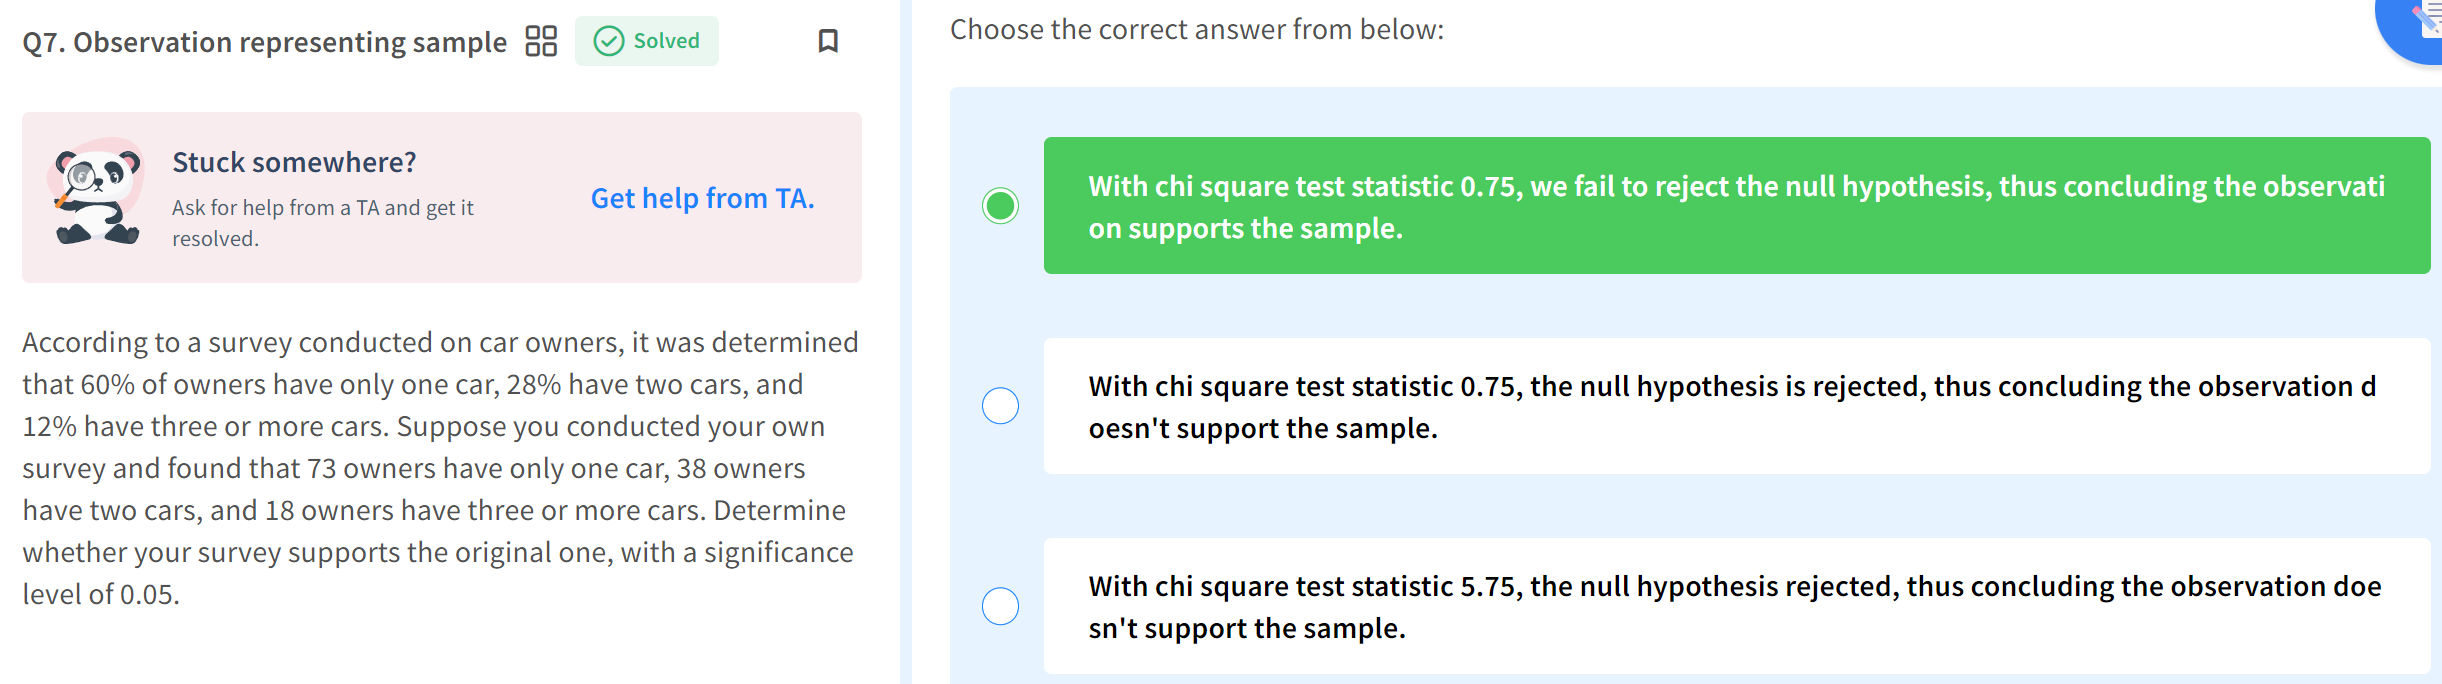

    H0 : observed proportion of car owner suppor the original survey
    Ha : observed proportion of car owners dont support original survey 


    observed one car owners = 73
    observed two car owners = 38
    observed more than three= 18 

    Expected one car owners = 129 * 0.6 = 77.39
    Expected two car owners = 129 * 0.28 = 36.12
    Expected more than three= 129 * 0.12 = 15.47

    χ2 = ((Oi- Ei)**2)/Ei

In [369]:
((73 - 77.39)**2)/77.39,((38-36.12)**2)/36.12, ((18-15.48)**2)/15.48

(0.24902571391652675, 0.09785160575858277, 0.41023255813953474)

In [372]:
test_statistic = 0.25+0.09+0.41
test_statistic

0.75

In [374]:
critical = stats.chi2.ppf(0.95,2)
critical

5.991464547107979

In [375]:
test_statistic > critical

False

In [ ]:
so , failed to reject null hypothesis 
observed proportion of car owners dont support original survey. 

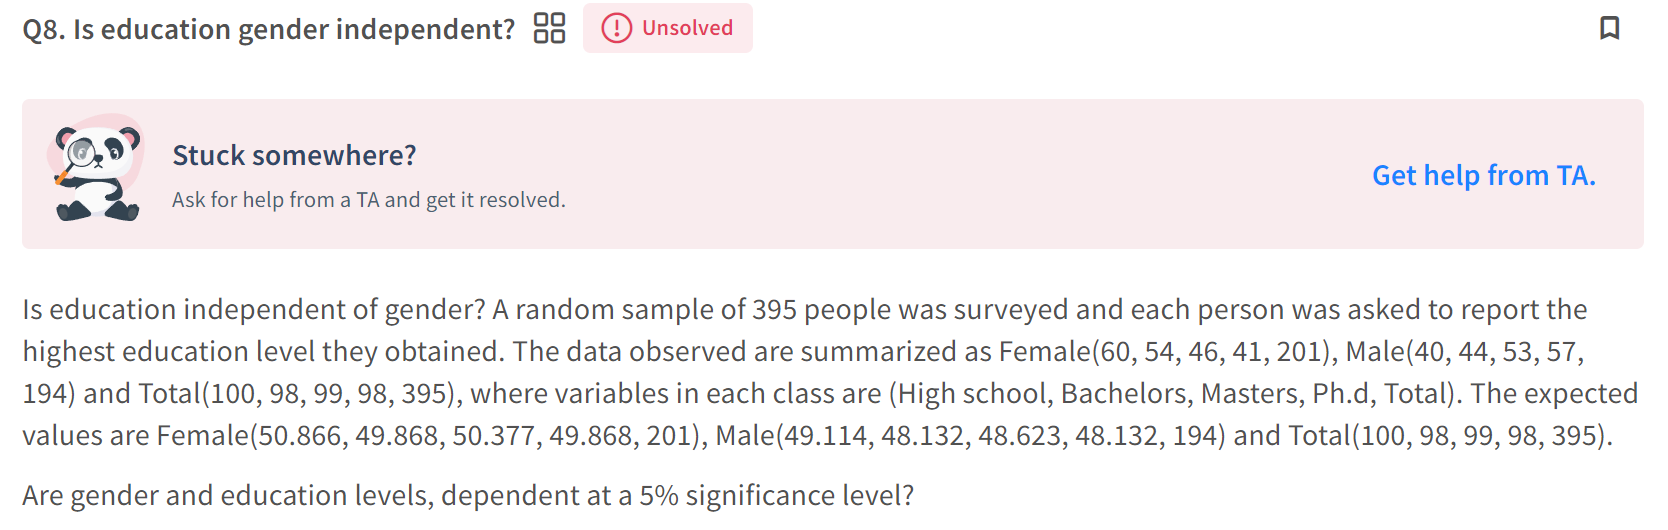

    H0 : gender and education level are independent
    Ha : gender and education level are dependent 

In [377]:
Female_observed = np.array([60,54,46,41])
Male_observed =   np.array([40,44,53,57])

In [379]:
Female_expected =  np.array([50.866, 49.868, 50.377, 49.868])
Male_expected = np.array([49.114, 48.132, 48.623, 48.132])

In [385]:
np.sum((Female_observed-Female_expected)**2/Female_expected)

3.9398502473868504

In [386]:
np.sum((Male_observed-Male_expected)**2/Male_expected)

4.073873637080219

In [388]:
3.9398502473868504+4.073873637080219


8.013723884467069

In [389]:
stats.chi2.ppf(0.95,3)

7.814727903251179

In [390]:
8.01 > 7.81

True

    reject null that : 
        gender and education level are dependent 


## Number of surgeries in a hospital per day.

In [246]:
import numpy as np
from scipy.stats import poisson, expon
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [247]:
# Number of surgeries in a hospital per day : Poisson
# Sample of 200 observations
V = [ 2,  5,  6,  3,  2,  6,  2, 10,  4,  4,  8,  3,  3,  3,  3,  8,  7,
        6,  9,  4,  5,  5,  5,  5,  4, 10,  9,  4,  0,  8,  4,  6,  5,  5,
        6,  1,  6,  7,  2,  3,  5,  7,  2,  3,  4,  5,  7,  4,  5,  4,  3,
        3,  8,  1,  6,  8,  6,  6,  3,  9,  8,  2,  3,  6,  5,  8,  8,  5,
        7,  7,  6,  7,  6,  6,  9,  3,  6, 12,  4,  4,  3,  2,  2,  2,  4,
        8,  5,  3,  6,  2,  5,  3,  2,  6,  9,  2,  7,  4,  4,  3,  4,  5,
        8,  9,  4,  6,  6,  2,  2,  7,  2, 10,  8,  2,  6,  3,  7,  2,  3,
        8, 11,  4,  5,  6,  3,  7,  5,  3,  3,  6,  7,  4,  3,  4,  8,  1,
        5,  5,  1,  4,  6,  6,  8,  8,  4,  6,  7,  5,  1,  7,  9,  6,  2,
        3,  8,  6,  4,  2,  7,  2,  6,  9,  7,  9,  4,  7,  3,  8,  4, 10,
        5,  5,  3,  5,  2,  7,  4,  4,  5,  3,  8, 10,  4,  6,  3,  4,  3,
        4,  7,  5,  0,  6,  3,  4,  6,  8,  7,  6,  7,  6]

<AxesSubplot:ylabel='Density'>

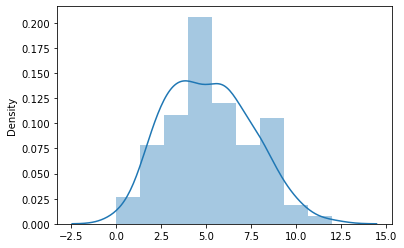

In [248]:
sns.distplot(V) 
# Looks like Gaussian
# Can it be Gaussian?

In [249]:
# Params of Poisson distribution: lambda = mean 
lambda_estimated = np.mean(V)
print(lambda_estimated)

# on an averge, we expect approx 5 surgeries per day.

5.12


In [250]:
# What is the probability that the hopsital has to do more than 10 surgeries in a day?

print(1 - poisson.cdf(10, lambda_estimated))

0.016004884984684664


In [251]:
# What is the probability that the hopsital has to do less than 2 surgeries in a day?

print(poisson.cdf(1, lambda_estimated))

0.03657326011743636


In [252]:
# What is the probability that there will be exactly 5 surgeies in a day?
print(poisson.pmf(5, lambda_estimated))

0.17521884429105677


In [253]:
# What is the average time difference between two surgeries?
print(1/lambda_estimated)

0.1953125


# cdf

In [235]:
# Discrete r.v
V = np.array([ 2,  5,  6,  3,  2,  6,  2, 10,  4,  4,  8,  3,  3,  3,  3,  8,  7,
        6,  9,  4,  5,  5,  5,  5,  4, 10,  9,  4,  0,  8,  4,  6,  5,  5,
        6,  1,  6,  7,  2,  3,  5,  7,  2,  3,  4,  5,  7,  4,  5,  4,  3,
        3,  8,  1,  6,  8,  6,  6,  3,  9,  8,  2,  3,  6,  5,  8,  8,  5,
        7,  7,  6,  7,  6,  6,  9,  3,  6, 12,  4,  4,  3,  2,  2,  2,  4,
        8,  5,  3,  6,  2,  5,  3,  2,  6,  9,  2,  7,  4,  4,  3,  4,  5,
        8,  9,  4,  6,  6,  2,  2,  7,  2, 10,  8,  2,  6,  3,  7,  2,  3,
        8, 11,  4,  5,  6,  3,  7,  5,  3,  3,  6,  7,  4,  3,  4,  8,  1,
        5,  5,  1,  4,  6,  6,  8,  8,  4,  6,  7,  5,  1,  7,  9,  6,  2,
        3,  8,  6,  4,  2,  7,  2,  6,  9,  7,  9,  4,  7,  3,  8,  4, 10,
        5,  5,  3,  5,  2,  7,  4,  4,  5,  3,  8, 10,  4,  6,  3,  4,  3,
        4,  7,  5,  0,  6,  3,  4,  6,  8,  7,  6,  7,  6])

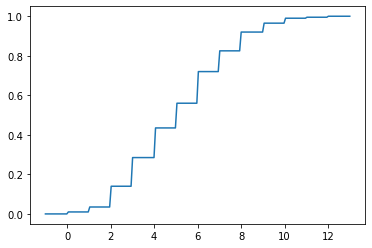

In [236]:
min = np.min(V) - 1
max = np.max(V) + 1
total = len(V)
x_values = np.linspace(min, max, total)
y_values = []
for x in x_values:
    df = V[V <= x]
    y_values.append(len(df)/total)
plt.plot(x_values, y_values)


<AxesSubplot:ylabel='Proportion'>

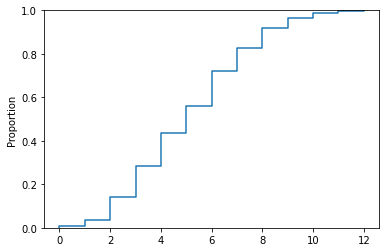

In [237]:
sns.ecdfplot(V) 

In [170]:
V = stats.norm.rvs(35,3,1000)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001, 0.001, 0.001, 0.001, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.007, 0.008, 0.008, 0.008, 0.008, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.01, 0.01, 0.01, 0.01, 0.01, 0.011, 0.012, 0.012, 0.012, 0.012

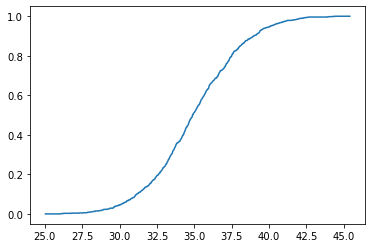

In [171]:
# V = stats.norm.rvs(35,3,1000)
min = np.min(V) - 1
max = np.max(V) + 1
total = len(V)
x_values = np.linspace(min, max, total)
y_values = []
for x in x_values:
    df = V[V <= x]
    y_values.append(len(df)/total)
print(y_values)
plt.plot(x_values, y_values)


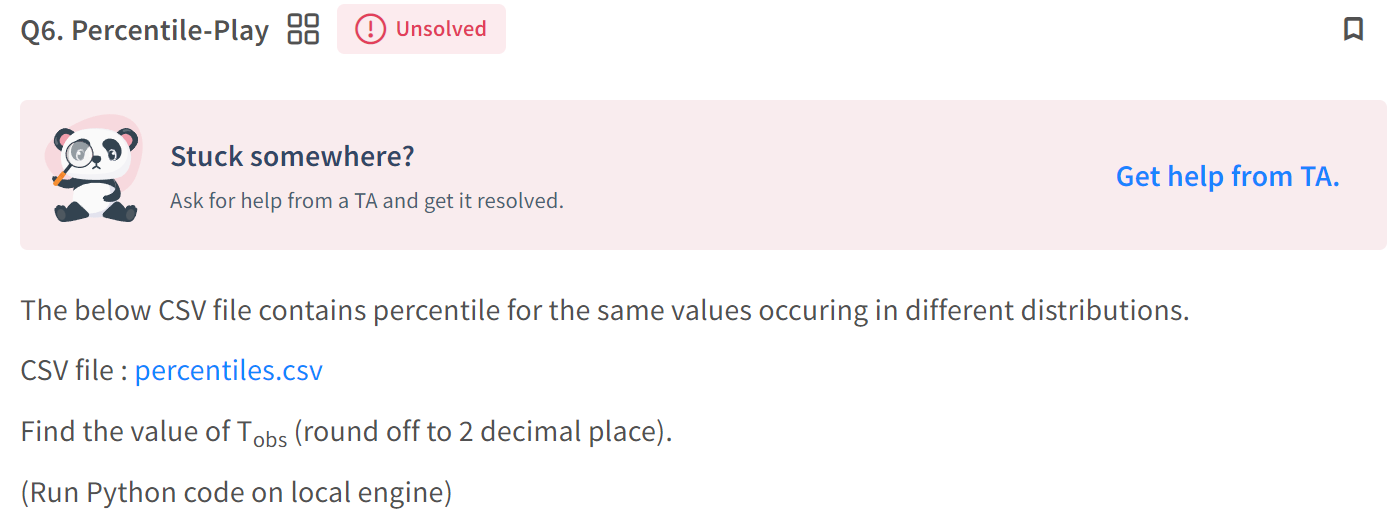

In [281]:
df = pd.read_csv("percentiles.txt",index_col=0)

In [282]:
df

,Dist1,Dist2
0,0.000483,0.014939
1,0.002950,0.041212
2,0.004308,0.051100
3,0.005412,0.058199
4,0.008340,0.074554
...,...,...
49995,99.992134,96.804505
49996,99.995023,97.306047
49997,99.996875,97.736447
49998,99.997964,98.072219


In [395]:
np.max(df["Dist1"]-df["Dist2"])/100

0.3425173530999999

In [216]:
V = stats.binom.rvs(100, 0.5,size=5000)

In [217]:
min = np.min(V) - 1
max = np.max(V) + 1
min,max

(31, 67)

In [218]:
total = len(V)


In [219]:
x_values = np.linspace(min, max, total)


In [220]:
# x_values

In [221]:
y_values = []


In [222]:
for i,x in enumerate(x_values):
    arr = (V[V<=x])
    y_values.append( len(arr)/total )
# print(y_values)

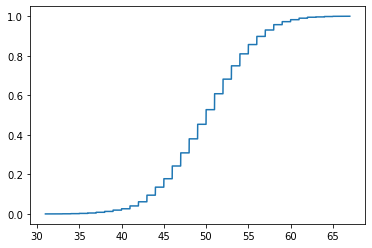

In [223]:
plt.plot(x_values, y_values)
